In [ ]:
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethrityeight')

In [2]:
import yfinance as yf
df=yf.download('AAPL',start='2012-01-01',end='2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402627,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469277,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607713,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739511,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719308,394024400
...,...,...,...,...,...,...
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974518,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342964,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316277,146266000


In [5]:
df.shape

(2012, 6)

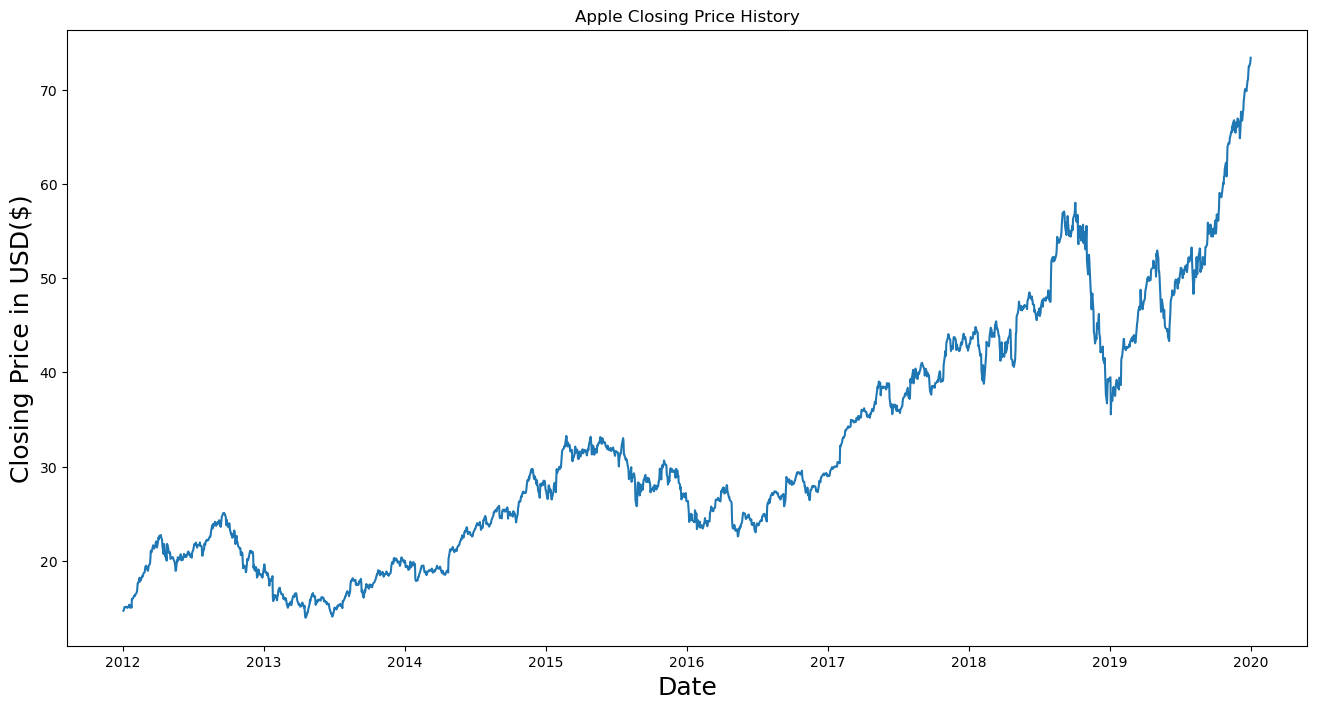

In [6]:
plt.figure(figsize= (16,8))
plt.title('Apple Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price in USD($)', fontsize=18)
plt.show()

In [7]:
data= df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)

In [8]:
training_data_len

1610

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [11]:
scaled_data

array([[0.01243228],
       [0.01375958],
       [0.01651631],
       ...,
       [0.98381398],
       [0.99104513],
       [1.        ]])

In [24]:
# Create a training data set 
# Create a scaled training data set
train_data=scaled_data[0:training_data_len, : ]
# Split the data into x_train and y_train
x_train=[]
y_train=[]
for i in range(61, len(train_data)):
    x_train.append(train_data[i-60 : i ,0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()


[array([0.01375958, 0.01651631, 0.01914091, 0.01873851, 0.0196454 ,
       0.01923099, 0.0185343 , 0.01758536, 0.02052227, 0.02317089,
       0.02235408, 0.01787965, 0.02214988, 0.01794572, 0.0337113 ,
       0.03249211, 0.03408368, 0.03752507, 0.03960912, 0.03943495,
       0.03879233, 0.04153103, 0.04410756, 0.04702647, 0.05174113,
       0.06164491, 0.06179505, 0.06730851, 0.07142856, 0.06434759,
       0.06707427, 0.06702022, 0.07466578, 0.07357869, 0.07559067,
       0.07920624, 0.08121825, 0.08701398, 0.09123612, 0.09245533,
       0.09288177, 0.08566265, 0.0839209 , 0.08417917, 0.09096589,
       0.09287577, 0.09697783, 0.10664737, 0.11954812, 0.11713373,
       0.11713972, 0.12646695, 0.12938586, 0.12730777, 0.12540992,
       0.12343396, 0.12999843, 0.1345029 , 0.13638876, 0.13172814])]
[0.12553603586771372]



In [25]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [28]:
# Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1] , 1))
x_train.shape

(1549, 60, 1)

In [32]:
# Building the LSTM Model
model = Sequential()

# First LSTM layer with 50 units and return_sequences=True
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Second LSTM layer with 50 units and return_sequences=False
model.add(LSTM(50, return_sequences=False))

# Adding a Dense layer with 25 units
model.add(Dense(25))

# Final output Dense layer with 1 unit for regression output
model.add(Dense(1))

In [33]:
# Compile the Model
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [34]:
# Train the Model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1549/1549 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0023


In [45]:
# # Now that we have trained our model, we now have to test out our model
# # Create a new array containing scaled values from index 1543 to 2003
# test_data=scaled_data[training_data_len-60: , : ]
# # Create the data sets x_sets and y_sets
# x_test=[]
# y_test=dataset[training_data_len:, :]
# for i in range(60, len(test_data)):
#     x_test.append(test_data[i-60:1, 0])


# Create a new array containing scaled values from index training_data_len-60 to the end
test_data = scaled_data[training_data_len-60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

# Populate x_test with sequences of the past 60 time steps from test_data
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert x_test to a numpy array
x_test = np.array(x_test)

# Reshape the data to 3D for LSTM model [samples, time steps, features]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions on the test data using the trained model
predictions = model.predict(x_test)

# Inverse transform predictions and y_test to get actual values if you had scaled them earlier
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Print the first few predictions and actual values for verification
for i in range(5):
    print(f"Predicted: {predictions[i][0]:.2f}, Actual: {y_test[i][0]:.2f}")



13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Predicted: 49.48, Actual: 2807.32
Predicted: 49.51, Actual: 2801.37
Predicted: 49.53, Actual: 2792.00
Predicted: 49.50, Actual: 2842.10
Predicted: 49.58, Actual: 2865.74


In [44]:

x_test=np.array(x_test) 

In [47]:
x_test

array([[[0.50626423],
        [0.50882876],
        [0.5081981 ],
        ...,
        [0.55734467],
        [0.55646177],
        [0.55826959]],

       [[0.50882876],
        [0.5081981 ],
        [0.50130329],
        ...,
        [0.55646177],
        [0.55826959],
        [0.55541073]],

       [[0.5081981 ],
        [0.50130329],
        [0.50933324],
        ...,
        [0.55826959],
        [0.55541073],
        [0.5537291 ]],

       ...,

       [[0.6859918 ],
        [0.69381153],
        [0.71983519],
        ...,
        [0.95942994],
        [0.96056502],
        [0.98427651]],

       [[0.69381153],
        [0.71983519],
        [0.72004541],
        ...,
        [0.96056502],
        [0.98427651],
        [0.98381398]],

       [[0.71983519],
        [0.72004541],
        [0.70886235],
        ...,
        [0.98427651],
        [0.98381398],
        [0.99104513]]])

In [49]:
# Reshape the test data
x_test= np.reshape(x_test , (x_test.shape[0], x_test.shape[1] ,1 ))

In [50]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [51]:
# Get the RMSE
rmse= np.sqrt( np.mean( predictions- y_test )**2 )

In [52]:
rmse

3005.113795478682

/var/folders/cy/srbrhz6x153d433f12lwpyz80000gn/T/ipykernel_18284/3605634444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] =predictions


KeyError: "[' Predictions'] not in index"

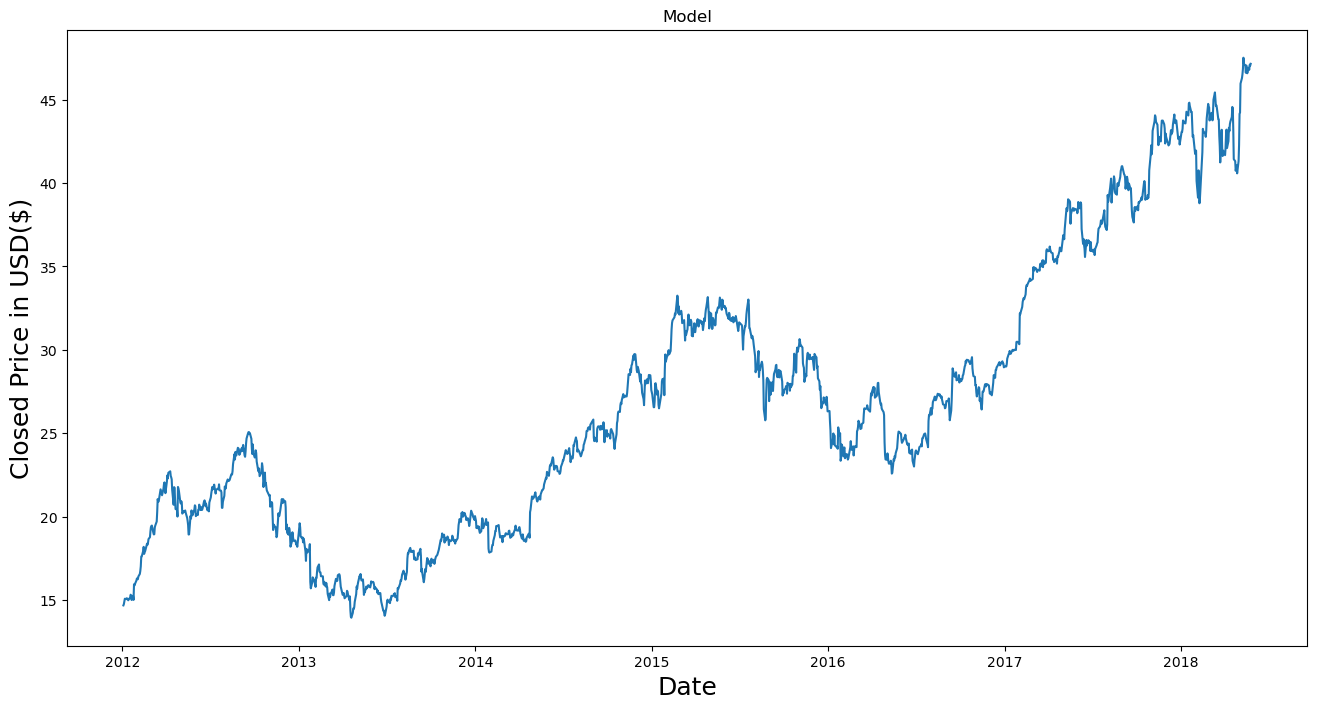

In [53]:
# # Plot the data
# train = data [: training_data_len] 
# valid = data[ training_data_len : ]
# valid['Predictions'] =predictions
# # Visualize the data
# plt.figure(figsize=(16,8))
# plt.title('Model')
# plt.xlabel('Date', fontsize=18)
# plt.ylabel('Closed Price in USD($)', fontsize=18)
# plt.plot(train['Close'])
# plt.plot(valid[['Close', ' Predictions']])
# plt.legend(['Train', 'Val', 'Predictions'], loc= 'lower right')
# plt.show()

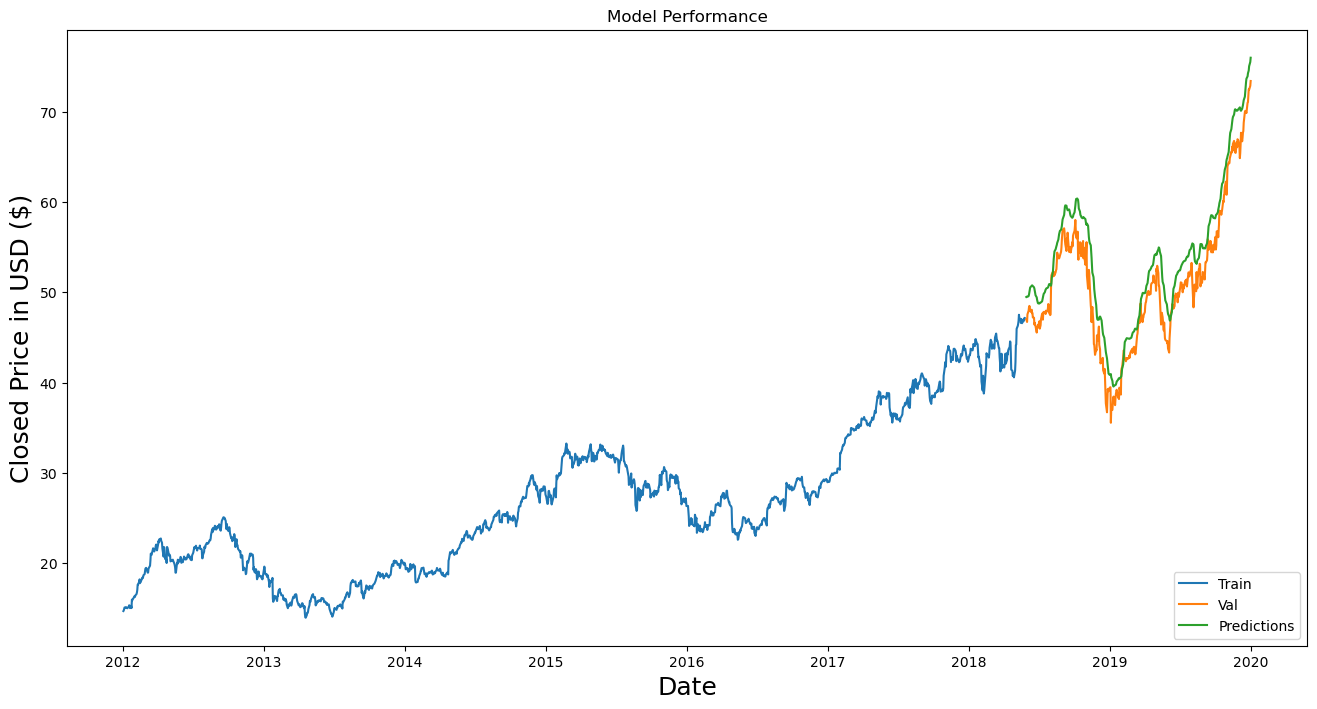

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your original DataFrame with actual values
# Assuming 'data' has a column named 'Close' for the actual close prices

# Create training and validation datasets
train = data[:training_data_len]
valid = data[training_data_len:].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Add the predictions to the validation data
valid['Predictions'] = predictions

# Plotting the data
plt.figure(figsize=(16, 8))
plt.title('Model Performance')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closed Price in USD ($)', fontsize=18)

# Plot the training data
plt.plot(train['Close'], label='Train')

# Plot the actual and predicted values in the validation set
plt.plot(valid['Close'], label='Val')
plt.plot(valid['Predictions'], label='Predictions')

# Add a legend
plt.legend(loc='lower right')
plt.show()

In [55]:
# Show the valid price and the predicted prices
valid

,Close,Predictions
Date,,
2018-05-29,46.974998,49.482552
2018-05-30,46.875000,49.514931
2018-05-31,46.717499,49.525715
2018-06-01,47.560001,49.504471
2018-06-04,47.957500,49.580849
...,...,...
2019-12-24,71.067497,74.261162
2019-12-26,72.477501,74.579056
2019-12-27,72.449997,75.048851


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your original DataFrame with actual values
# Assuming 'data' has a column named 'Close' for the actual close prices

# Create training and validation datasets
train = data[:training_data_len]
valid = data[training_data_len:].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Add the predictions to the validation data
valid['Predictions'] = predictions

# Plotting the data
plt.figure(figsize=(16, 8))
plt.title('Model Performance')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closed Price in USD ($)', fontsize=18)

# Plot the training data
plt.plot(train['Close'], label='Train')

# Plot the actual and predicted values in the validation set
plt.plot(valid['Close'], label='Val')
plt.plot(valid['Predictions'], label='Predictions')

# Add a legend
plt.legend(loc='lower right')
plt.show()

: 